#### Nama : Amin Fahri 
#### Kode Peserta : PYTN-KS01-002

Anggota Kelompok :
1. Amin Fahri (PYTN-KS01-002)
2. Jessica Athalia Rieuwpassa (PYTN-KS01-005)
3. Ninda Nurismiranda (PYTN-KS01-010)

# Final Project 2

## Perkenalan

Objektif yang ingin dicapai dari final project 2 ini yaitu mengevaluasi konsep logistic Regression dan SVM sebagai berikut :
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression untuk membuat prediksi

Dataset yang digunakan yaitu **Weather Australia** yang berisi data hujan harian selama 10 tahun di Australia. Dataset ini terdiri dari 23 kolom dan 145.460 data. Dataset diperoleh dari kaggle dengan link sebagai berikut https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 

Pada final project 2 ini akan dibuat prediksi apakah esok hari hujan ataukah tidak dengan volume hujan 1mm atau lebih dengan kolom RainTomorrow adalah target variable yang akan diprediksi.

## Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle

%matplotlib inline

## Data Loading

In [2]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Dataset ini memiliki 23 atribut. Atribut dalam dataset ini antara lain :
1. Date : tanggal hari itu
2. Location : Lokasi, nama kota di Australia
3. MinTemp : temperatur terendah hari itu dalam celcius
4. MinTemp : temperatur tertinggi hari itu dalam celcius
5. Rainfall : Jumlah curah hujan hari itu dalam mm
6. Evaporation : jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. Sunshine : jumlah jam hari itu cerah dengan cahaya matahar
8. WindGustDir : arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. WindGustSpeed : kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. WindDir9am : arah angin jam 9 pagi
11. WindDir3pm : arah angin jam 3 sore
12. WindSpeed9am : kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm : kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am : humiditas jam 9 pagi dalam persen
15. Humidity3pm : humiditas jam 3 sore dalam persen
16. Pressure9am : tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm : tekanan udara jam 3 sore dalam hpa
18.  Cloud9am : persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm : persentase langit yang tertutup awan jam 3 sore
20. Temp9am : temperatur jam 9 pagi dalam celcius
21. Temp3pm : temperatur jam 3 sore dalam celcius
22. RainToday : apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow : variable yang mau di prediksi

## Data Cleaning 

In [4]:
# Print the dimension of data set
df.shape

(145460, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Cek data types

In [6]:
#Melihat tipe objek masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dataset terdiri dari column dengan tipe object dan float

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

#### Mengubah format 'Date' dan droping yang aslinya

In [9]:
df['Date'] = pd.to_datetime(df['Date']) # parse as datatime

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df[['Date', 'Year', 'Month', 'Day']] # preview changes made

df.drop('Date', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

#### Mengecek data yang hilang dan bernilai nol

In [10]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [11]:
# Checking data completeness
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0
WindDir3pm,4228,3.0


Dari data diatas maka akan menghapus kolom dengan lebih banyak nilai yang hilang yaitu kolom Sunshine, Evaporation, Cloud3pm, Cloud9am

In [12]:
# menghapus data column yang tidak diperlukan
df=df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


Variabel target "RainTomorrow" memiliki dua data yang hilang, maka akan menghapus dua baris tersebut dari kumpulan data

In [13]:
missing

,no.of missing values,% missing_values
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0
WindDir3pm,4228,3.0


In [14]:
# Remove rows where target variables are missing
df.dropna(how='all', subset=['RainTomorrow'], inplace=True) 
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# ekplorasi data
df['RainTomorrow'].value_counts().plot(kind='bar')

In [ ]:
# mengganti No (0) dan Yes (1) pada kolom RainToday dan RainTomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

### Cek Data Numerical

In [15]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
df_num = df[num_col]
df_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

### Cek Data Categorical

In [16]:
# exrtact categorical features
cat_col=df.select_dtypes(object).columns.tolist()
df_cat = df[cat_col]
df_cat.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


#### Data Numerical

Kita tahu bahwa ada beberapa jumlah nilai yang hilang untuk setiap fitur. Tergantung pada gangguannya, kita akan menggantinya dengan median atau mean

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-p

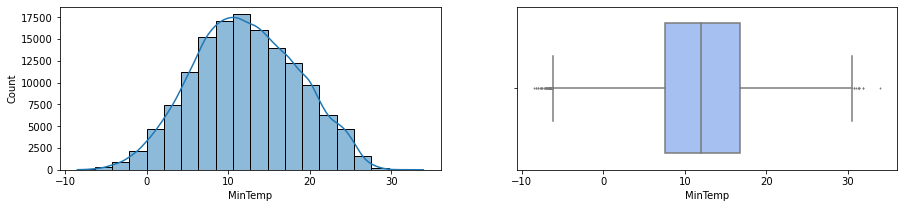

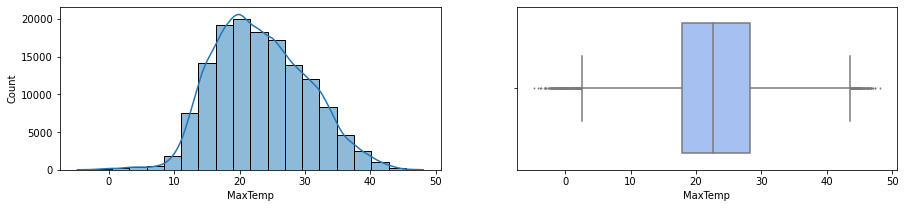

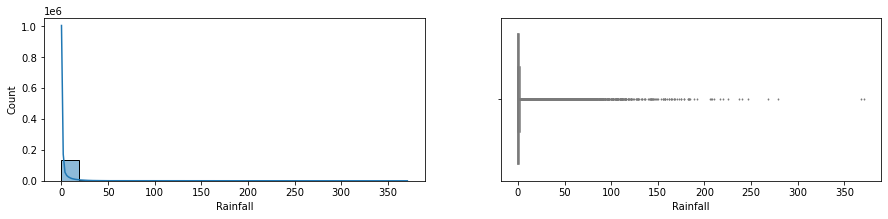

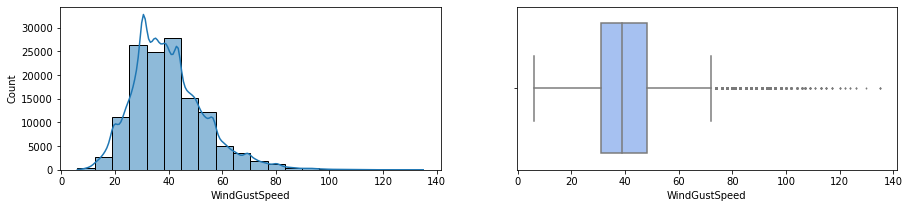

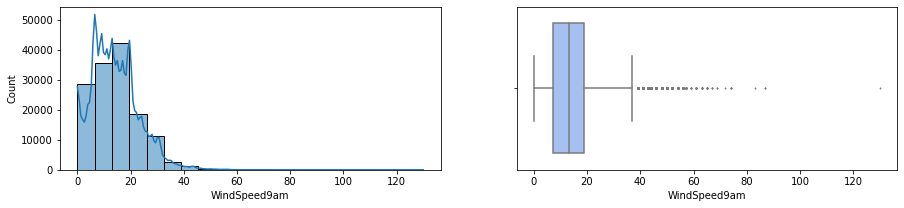

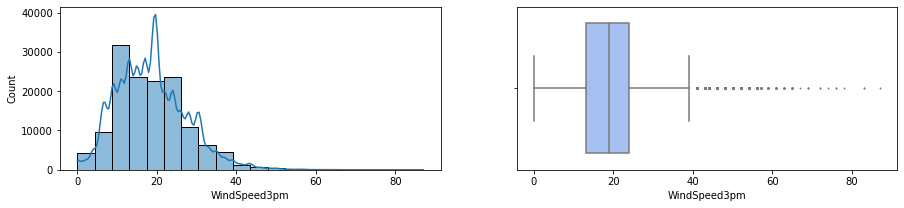

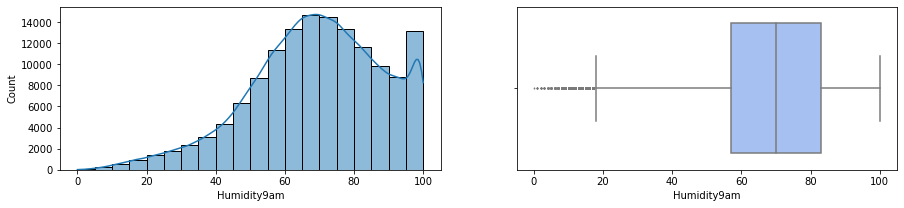

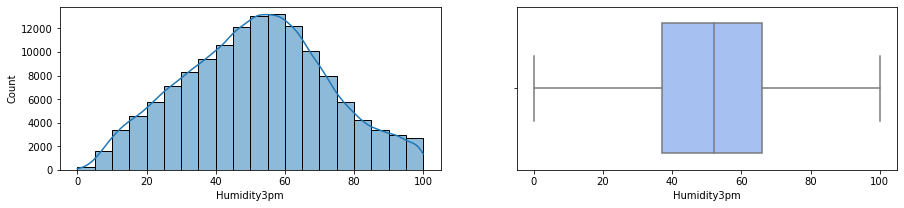

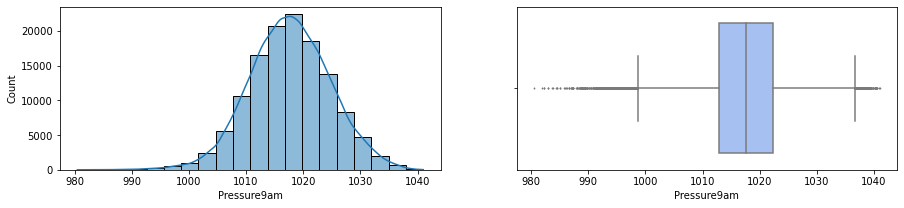

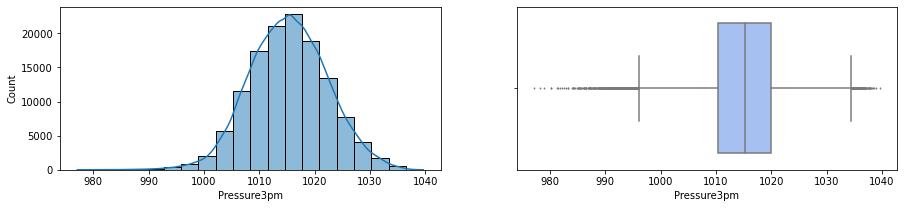

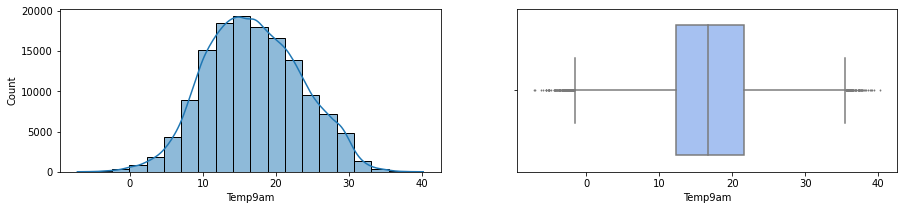

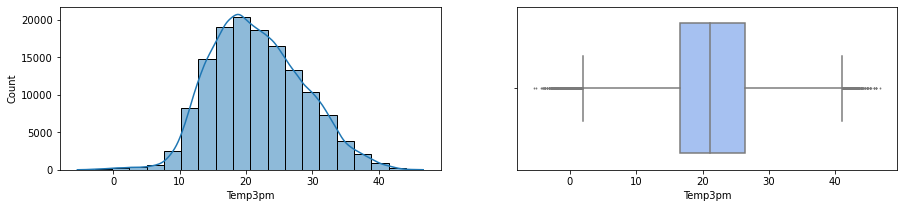

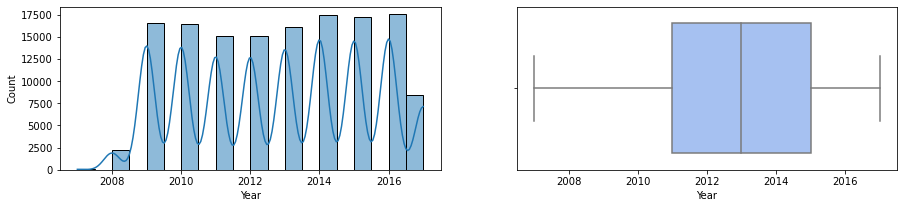

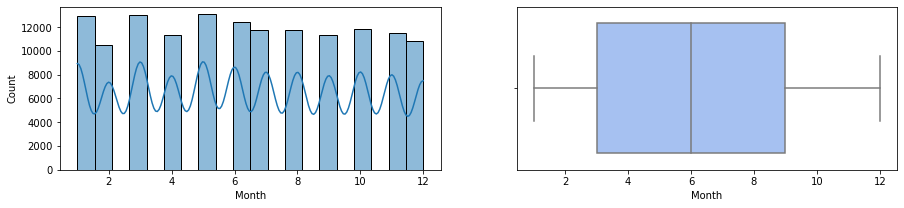

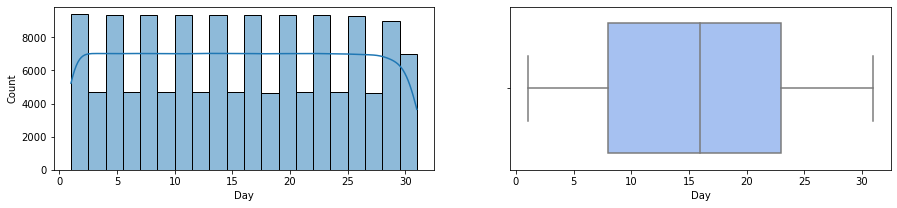

In [17]:
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Data "Rainfall" nampaknya memiliki distorsi yang sangat besar, oleh karena itu akan menghapus colom ini.

In [19]:
# droping rainfall column in dataframe and Numerical columns
df=df.drop(['Rainfall'], axis=1)
num_col
num_col.remove('Rainfall')

## Data Preprocessing

#### Data encoding dan Imputation

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# Impute missing values for numerical features
median_values = df[num_col].median()
df[num_col] = df[num_col].fillna(value=median_values)

In [22]:
# Convert categorized values to numerical values
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

In [23]:
# Impute missing values for categorical features
mode_values=df[cat_col].mode()
df[cat_col] = df[cat_col].fillna(value=mode_values)

In [24]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [25]:
df.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


Kita dapat mengetahui bahwa semua fitur dalam dataframe adalah numerical. Mari kita lihat ketergantungan variabel independen 

## Eksplorasi Data

<AxesSubplot:>

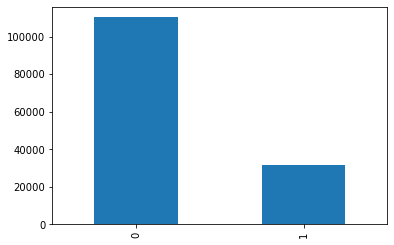

In [26]:
# ekplorasi data
df['RainTomorrow'].value_counts().plot(kind='bar')

0 artinya "No" dan 1 artinya "yes"

<ipython-input-27-c32b53723580>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


<AxesSubplot:>

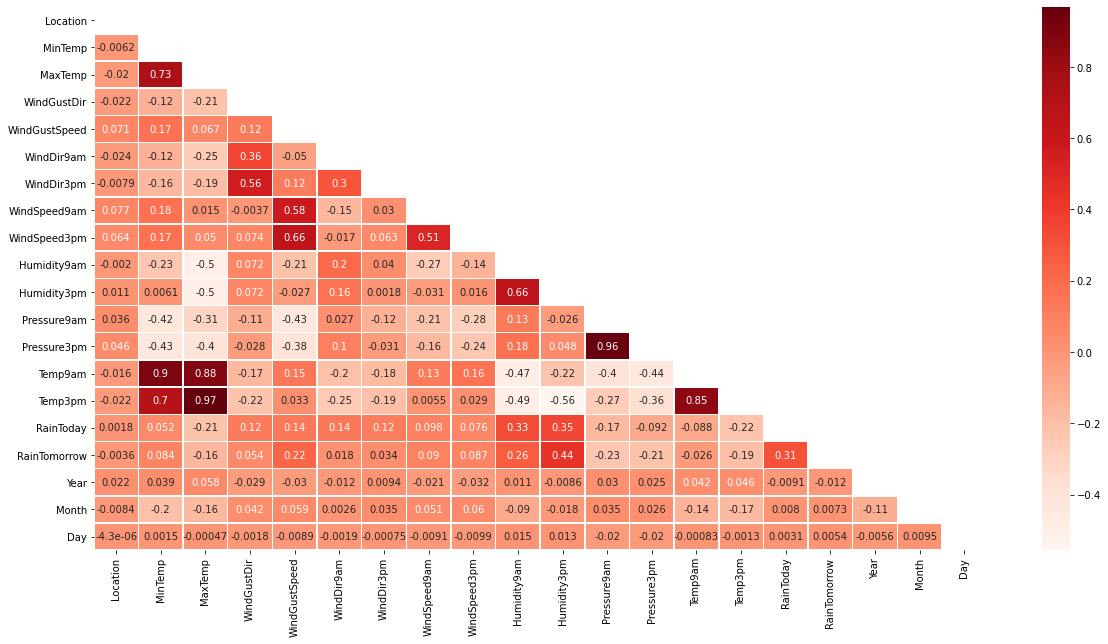

In [27]:
#membuat plot heatmap untuk melihat korelasi satu sama lain
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

In [28]:
# lets drop the correlated variables
df=df.drop(columns=['Temp9am','Temp3pm','Pressure9am'],axis=1)

In [29]:
numcol_del=['Temp9am','Temp3pm','Pressure9am']
num_cols = list(set(num_col) - set(numcol_del))
num_cols

['WindSpeed9am',
 'WindSpeed3pm',
 'Pressure3pm',
 'Day',
 'Month',
 'Humidity3pm',
 'Humidity9am',
 'Year',
 'WindGustSpeed',
 'MaxTemp',
 'MinTemp']

### Data Scalling

In [30]:
df.shape

(142193, 17)

In [31]:
cat_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [32]:
df.describe()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.740655,12.185565,23.225365,8.255885,39.920123,7.915755,7.974471,13.992489,18.644279,68.858235,51.495742,1015.252481,0.240989,0.224181,2012.758926,6.402544,15.715084
std,14.237503,6.388936,7.109617,4.953096,13.140632,4.911307,4.731493,8.851614,8.721688,18.932512,20.532227,6.681810,0.450212,0.417043,2.541256,3.426506,8.798150
min,0.000000,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,977.100000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,11.000000,7.600000,17.900000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1011.000000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,24.000000,12.000000,22.600000,9.000000,39.000000,8.000000,8.000000,13.000000,19.000000,70.000000,52.000000,1015.200000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,13.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1019.400000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,16.000000,135.000000,16.000000,16.000000,130.000000,87.000000,100.000000,100.000000,1039.600000,2.000000,1.000000,2017.000000,12.000000,31.000000


## Pendefinisian Model

Setelah melalui tahap data cleaning dan preprocessing maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya.

### Split Data

Split data menjadi data training dan testing dengan ratio 70:30

In [38]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (99535, 16)
Shape testing feature: (42658, 16)
Shape training label: (99535,)
Shape training label: (42658,)


## Pelatihan Model dan Evaluasi Model

### 1. logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# function evaluation model 
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Prediction Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Calculate precision, recall, f1-score, and kappa score
    precision = metrics.precision_score(y_test, y_pred)

    # Caclculate recall 
    recall = metrics.recall_score(y_test, y_pred)
    # calculate f1-score
    f1_score = metrics.f1_score(y_test, y_pred)
    # calculate kappa score 
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}
    # return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
    #         'cm': cm}        

In [45]:
# mendefinisikan model
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Evaluasi Model
eval_lr = evaluate_model(model_lr, X_test, y_test)
print ('Logistic Regression Accuracy:', eval_lr['accuracy'])

Logistic Regression Accuracy: 0.8367246471939612


In [47]:
# Display Confussion matriks
print('Confusion matrix:', eval_lr['cm'])

Confusion matrix: [[31364  1737]
 [ 5228  4329]]


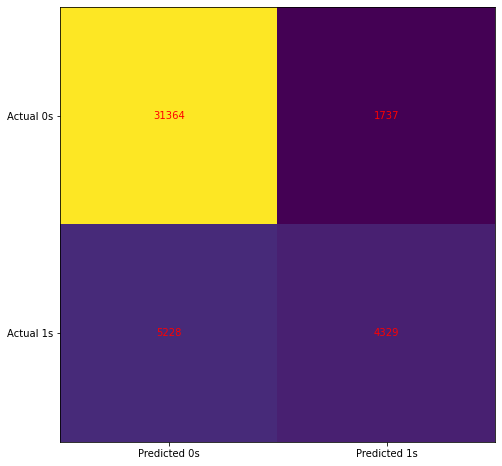

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_lr['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_lr['cm'][i, j], ha='center', va='center', color='red')
plt.show()

### Support Vector Machine

In [49]:
# Mendefinisikan Model
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [50]:
# Evaluasi Model
svm_pred =svm_model.predict(X_test)

In [57]:
# Display Confussion matriks
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, svm_pred)
print(matrix)

[[32591   510]
 [ 7214  2343]]


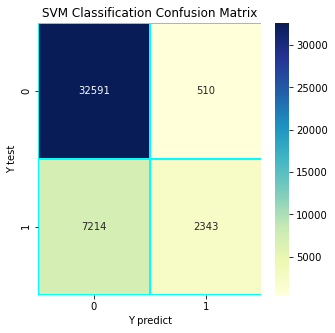

In [59]:
# confusion matrix
svm_model_cm = confusion_matrix(y_test, svm_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_model_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [60]:
# Evaluasi Model
score_svmcla = svm_model.score(X_test, y_test)
print(score_svmcla)

0.8189319705565193


## Kesimpulan

1. Pada project ini dilakukan prediksi mengenai apakah besok harinya hujan atau tidak di Australia dengan variabel target adalah 'RainTomorrow'

2. Prediksi menggunakan model Logistic Regression dan SVM diperoleh bahwa kemungkinan tidak terjadi hujan besok harinya di Australia yang diindikasikan dengan nilai 0 (No)

3. Berdasarkan kedua model tersebut diperoleh nilai akurasi untuk masing-masing model adalah ; Logistic Regression nilai akurasinya sebesar 0.8367246471939612 atau sebesar 83,67% sedangkan menggunakan SVM nilai akurasinya sebesar 0.8189319705565193 atau sebesar 81,89%. 

4. Kedua model tersebut sangat baik digunakan untuk membuat prediksi dikarenakan menghasilkan nilai akurasi yang besar. Tetapi dari kedua model (Logistic Regression dan SVM), model Logistic Regression dinilai baik dibandingkan dengan menggunakan model SVM dikarenakan nilai akurasi yang dihasilkan dari model Logistic Regression lebih besar dibandingkan dengan menggunakan SVM. Karena Nilai akurasi berkaitan dengan keakuratan atau ketelitian, jika nilai akurasi semakin besar maka pengukuran atau algoritma tersebut semakin baik.